In [16]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Data Sources

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [3]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [4]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [5]:
#Get json output of a track
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
#pprint(track)

# Create Dataframe of needed information

In [6]:
#sample = top_songs_CA_Q1[:50].copy()

### Pull data for all for Quarters

In [7]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary

retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


### Break master dictionary into dataframe for each quarter

In [8]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])

quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [9]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


# Sample Plots

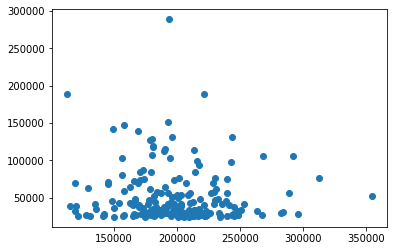

In [10]:
plt.scatter(df_Q1['Duration'], df_Q1['Streams'])
plt.show()

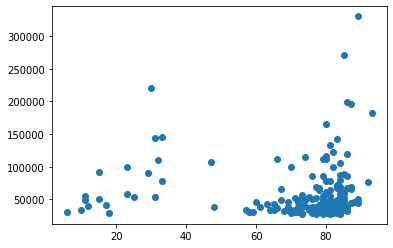

In [11]:
plt.scatter(df_Q2['Popularity'], df_Q2['Streams'])
plt.show()

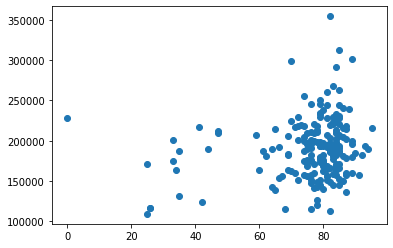

In [12]:
plt.scatter(df_Q3['Popularity'], df_Q3['Duration'])
plt.show()

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Streams'])
rvalue

-0.03288243520270742

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd8cab6208>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd8cacdc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd8ca8ce88>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd8cab6708>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd8cad2e88>],
 'means': []}

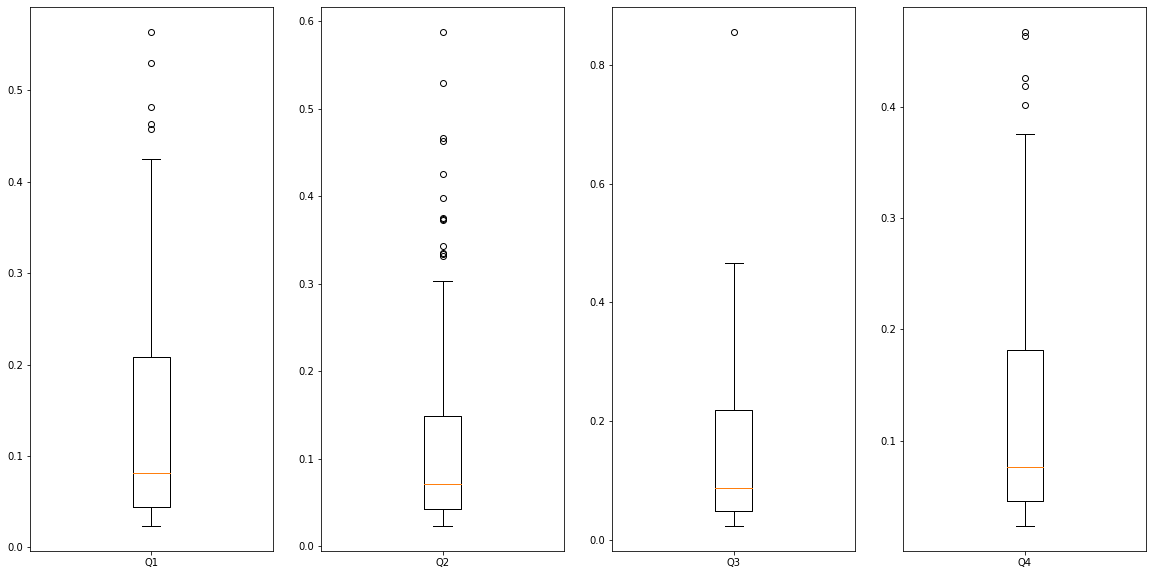

In [14]:
fig1, axs = plt.subplots(1,4,figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])

ax1.boxplot(df_Q1['Speechiness'])
ax2.boxplot(df_Q2['Speechiness'])
ax3.boxplot(df_Q3['Speechiness'])
ax4.boxplot(df_Q4['Speechiness'])

The correlation coefficient between Q1 Speechiness and Popularity is -0.13
The correlation coefficient between Q2 Speechiness and Popularity is 0.01
The correlation coefficient between Q3 Speechiness and Popularity is -0.02
The correlation coefficient between Q4 Speechiness and Popularity is 0.02


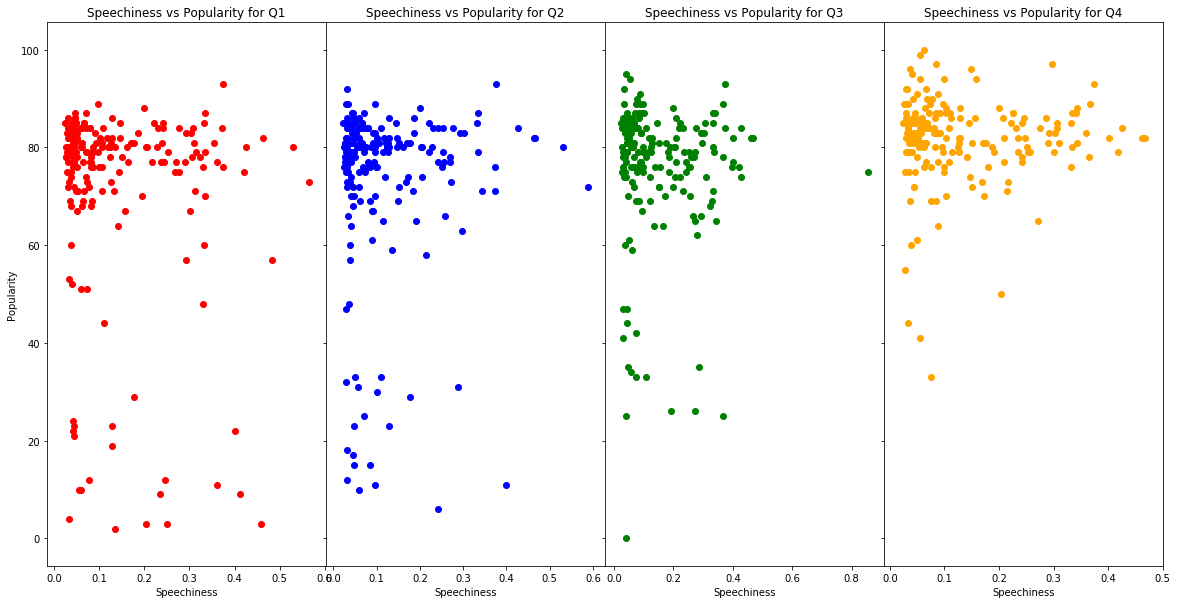

In [20]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Popularity'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Popularity'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Popularity'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Popularity'],color='orange')

ax1.set_title('Speechiness vs Popularity for Q1')
ax2.set_title('Speechiness vs Popularity for Q2')
ax3.set_title('Speechiness vs Popularity for Q3')
ax4.set_title('Speechiness vs Popularity for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Popularity')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Popularity is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Popularity is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Popularity is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Popularity is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Popularity'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Valence is -0.02
The correlation coefficient between Q2 Speechiness and Valence is -0.05
The correlation coefficient between Q3 Speechiness and Valence is 0.17
The correlation coefficient between Q4 Speechiness and Valence is 0.04


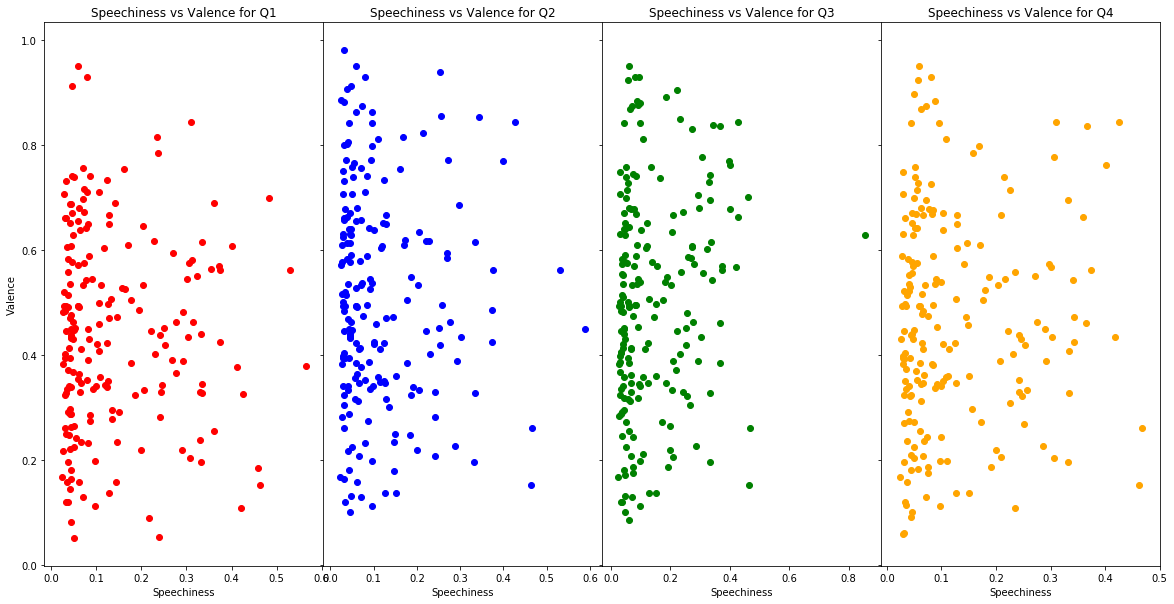

In [23]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Valence'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Valence'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Valence'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Valence'],color='orange')

ax1.set_title('Speechiness vs Valence for Q1')
ax2.set_title('Speechiness vs Valence for Q2')
ax3.set_title('Speechiness vs Valence for Q3')
ax4.set_title('Speechiness vs Valence for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Valence')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Valence is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Valence'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Valence is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Valence'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Valence is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Valence'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Valence is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Valence'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Popularity is -0.23
The correlation coefficient between Q2 Speechiness and Popularity is -0.2
The correlation coefficient between Q3 Speechiness and Popularity is -0.25
The correlation coefficient between Q4 Speechiness and Popularity is -0.28


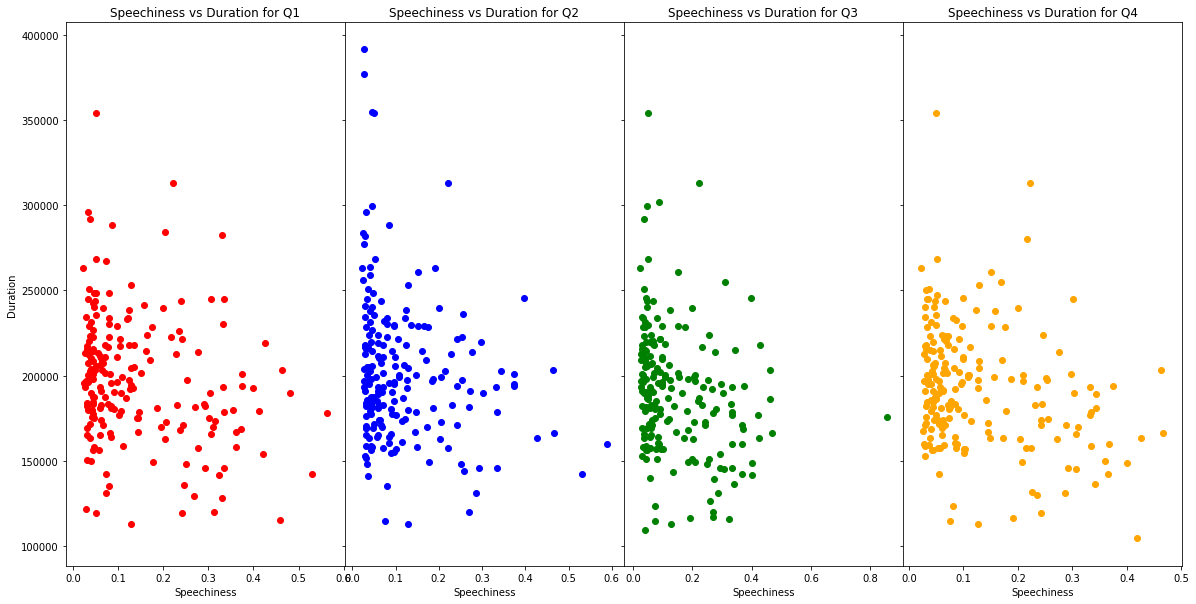

In [19]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Duration'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Duration'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Duration'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Duration'],color='orange')

ax1.set_title('Speechiness vs Duration for Q1')
ax2.set_title('Speechiness vs Duration for Q2')
ax3.set_title('Speechiness vs Duration for Q3')
ax4.set_title('Speechiness vs Duration for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Duration')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Popularity is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Duration'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Popularity is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Duration'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Popularity is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Duration'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Popularity is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Duration'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Danceability is 0.35
The correlation coefficient between Q2 Speechiness and Danceability is 0.34
The correlation coefficient between Q3 Speechiness and Danceability is 0.24
The correlation coefficient between Q4 Speechiness and Danceability is 0.27


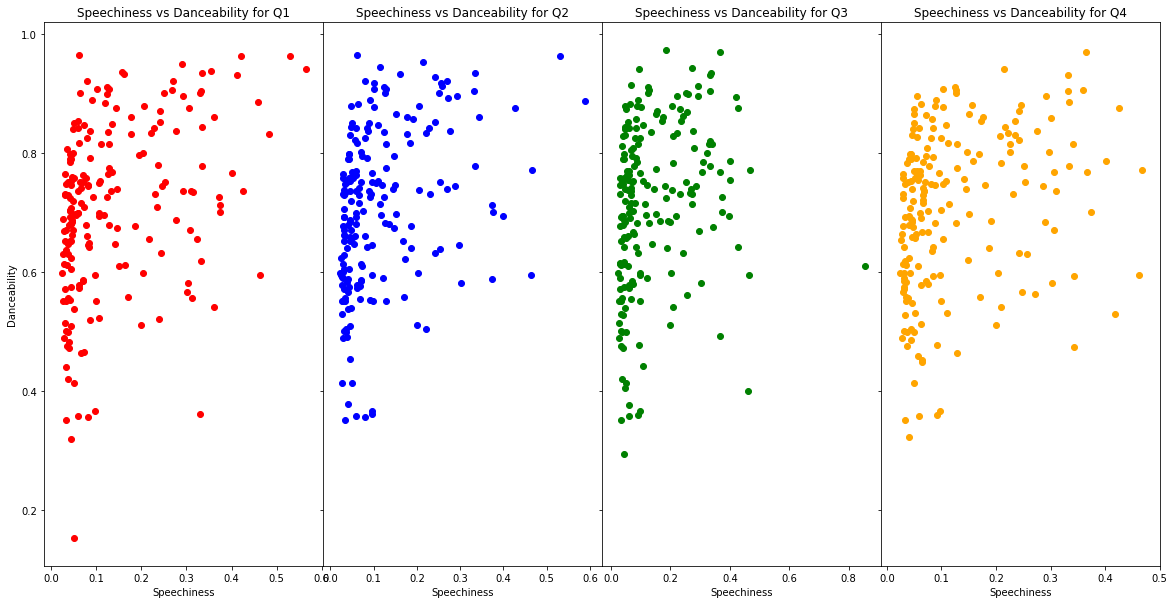

In [22]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Danceability'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Danceability'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Danceability'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Danceability'],color='orange')

ax1.set_title('Speechiness vs Danceability for Q1')
ax2.set_title('Speechiness vs Danceability for Q2')
ax3.set_title('Speechiness vs Danceability for Q3')
ax4.set_title('Speechiness vs Danceability for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Danceability')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Danceability is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Danceability is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Danceability is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Danceability'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Danceability is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Danceability'])[0],2)}")

The correlation coefficient between Q1 Speechiness and Streams is 0.17
The correlation coefficient between Q2 Speechiness and Streams is -0.01
The correlation coefficient between Q3 Speechiness and Streams is -0.02
The correlation coefficient between Q4 Speechiness and Streams is -0.07


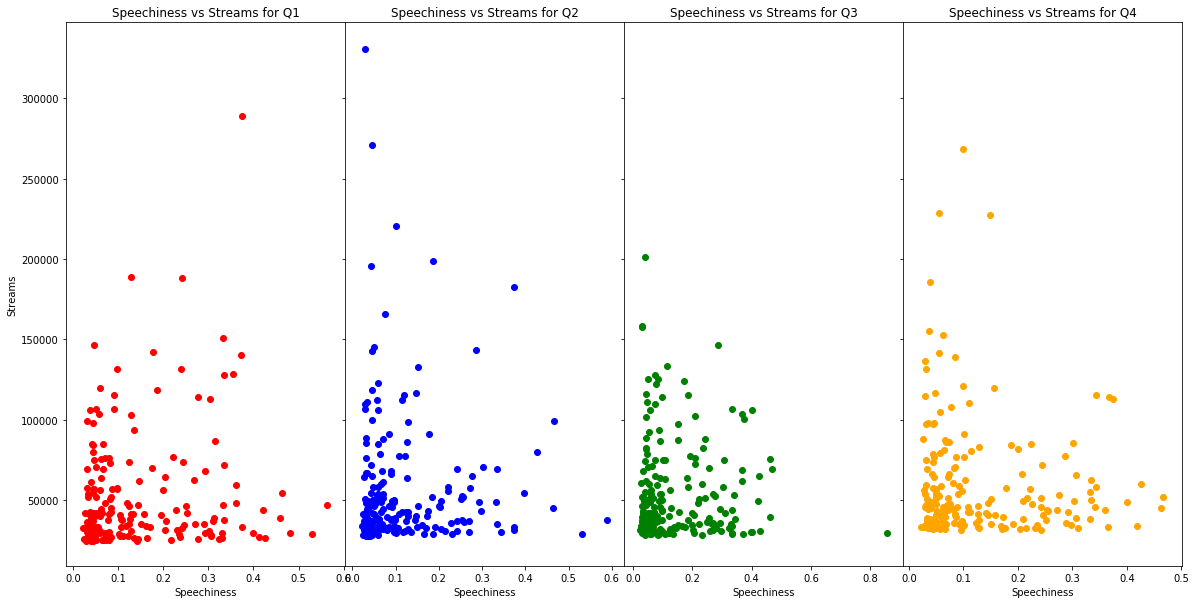

In [24]:
fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Speechiness'], df_Q1['Streams'],color='red')
ax2.scatter(df_Q2['Speechiness'], df_Q2['Streams'],color='blue')
ax3.scatter(df_Q3['Speechiness'], df_Q3['Streams'],color='green')
ax4.scatter(df_Q4['Speechiness'], df_Q4['Streams'],color='orange')

ax1.set_title('Speechiness vs Streams for Q1')
ax2.set_title('Speechiness vs Streams for Q2')
ax3.set_title('Speechiness vs Streams for Q3')
ax4.set_title('Speechiness vs Streams for Q4')

ax1.set_xlabel('Speechiness')
ax1.set_ylabel('Streams')
ax2.set_xlabel('Speechiness')
ax3.set_xlabel('Speechiness')
ax4.set_xlabel('Speechiness')

print(f"The correlation coefficient between Q1 Speechiness and Streams is {round(pearsonr(df_Q1['Speechiness'],df_Q1['Streams'])[0],2)}")
print(f"The correlation coefficient between Q2 Speechiness and Streams is {round(pearsonr(df_Q2['Speechiness'],df_Q2['Streams'])[0],2)}")
print(f"The correlation coefficient between Q3 Speechiness and Streams is {round(pearsonr(df_Q3['Speechiness'],df_Q3['Streams'])[0],2)}")
print(f"The correlation coefficient between Q4 Speechiness and Streams is {round(pearsonr(df_Q4['Speechiness'],df_Q4['Streams'])[0],2)}")

In [25]:
#ANOVA for Speechiness for each quarter
group_speech_Q1 = df_Q1["Speechiness"]
group_speech_Q2 = df_Q2["Speechiness"]
group_speech_Q3 = df_Q3["Speechiness"]
group_speech_Q4 = df_Q4["Speechiness"]

f_oneway(group_speech_Q1,group_speech_Q2,group_speech_Q3,group_speech_Q4)
####Results shows that there is no statistically significant difference between Speechiness amongst the 4 quarters

F_onewayResult(statistic=2.2297619517309726, pvalue=0.08335865914750178)